In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib 
%matplotlib inline
matplotlib.rcParams['animation.embed_limit'] = 100 

/tmp/ipykernel_1726/2705449234.py:24: UserWarning: frames=<generator object frame_generator at 0x7f4664403a00> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, repeat=False)


/opt/conda/envs/python3/lib/python3.12/site-packages/matplotlib/animation.py:1762: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


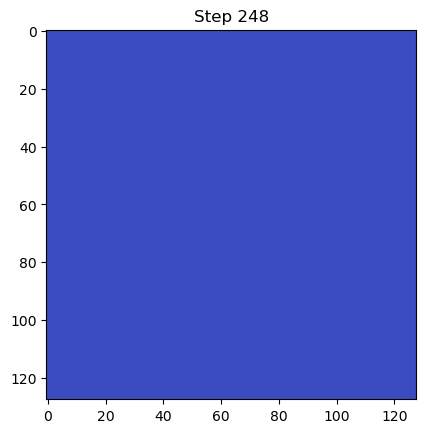

In [11]:
N = 128  # Number of rows
M = 128  # Number of columns
path = "OUT.jade"

def frame_generator():
    """ Lazily load each row from the file using np.loadtxt """
    with open(path, "r") as file:
        for line in file:
            yield np.fromstring(line, sep=" ").reshape(N, M)

frames = frame_generator()  # Create generator instance

fig, ax = plt.subplots()
im = ax.imshow(next(frames), cmap='coolwarm', interpolation='nearest')  # First frame

def update(frame):
    """ Update function for animation """
    im.set_array(frame)
    ax.set_title(f"Step {update.frame_number}")
    update.frame_number += 1

update.frame_number = 0  # Initialize frame counter

ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, repeat=False)

from IPython.display import HTML
HTML(ani.to_jshtml())


In [ ]:
N = 500  # Number of rows
M = 500  # Number of columns
path = "OUTPUT.jade"

def read_file(filename):
    steps = []
    with open(filename, 'r') as file:
        for line in file:
            arr = list(map(int, line.split()))
            steps.append(arr)
    return steps


steps = np.loadtxt(path)
steps_2D = [np.array(step).reshape(N, M) for step in steps]

fig, ax = plt.subplots()
im = ax.imshow(steps_2D[0], cmap='coolwarm', interpolation='nearest')

def update(frame):
    im.set_array(steps_2D[frame])
    ax.set_title(f"Step {frame}")

ani = animation.FuncAnimation(fig, update, frames=len(steps_2D), interval=200, repeat=True)

from IPython.display import HTML
HTML(ani.to_jshtml())
